In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# LAB 3 - Ekstrakcja podstawowych parametrów geometrycznych na obrazach binarnych

In [35]:
class ImagesToAnalyse:
    def __init__(self, imSrc):
        self.sourceImage = imSrc
        self.grayImage = self.makeImageGray()
        self.binImage = self.makeImageBin()
        self.clearedEdge = self.clearEdge(self.binImage)
        self.filled = self.fillHoles(self.binImage)

    def makeImageGray(self):
        return cv2.cvtColor(self.sourceImage, cv2.COLOR_BGR2GRAY)

    def makeImageBin(self):
        (tmp_thresh, tmp_bin) = cv2.threshold(self.grayImage, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        return tmp_bin
    
    def fillHoles(self, srcImage):
        negateImg = np.invert(srcImage)
        clearedInv = self.clearEdge(negateImg)
        filledResult = cv2.bitwise_or(srcImage, clearedInv)
        return filledResult

    def clearEdge(self, srcImage):
        kernel = np.ones((3, 3), np.uint8)
        base = srcImage.copy()
        [dx, dy] = base.shape
        operator = base.copy()
        operator[1:dx - 1, 1:dy - 1] = 0

        while True:
            oldOperator = operator.copy()
            operator = cv2.dilate(operator, kernel, iterations=1)
            operator = cv2.bitwise_and(operator, base)

            if (np.array_equal(operator, oldOperator)):
                result = operator
                break
        
        cleared = cv2.bitwise_xor(result, srcImage)
        return cleared

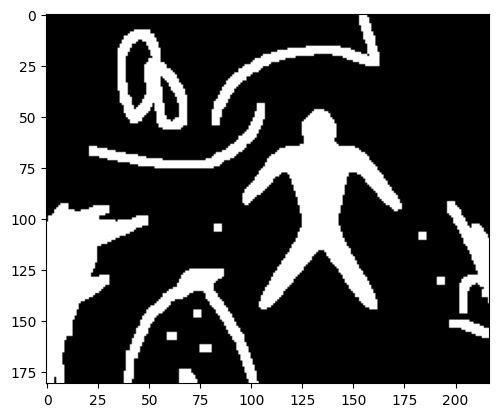

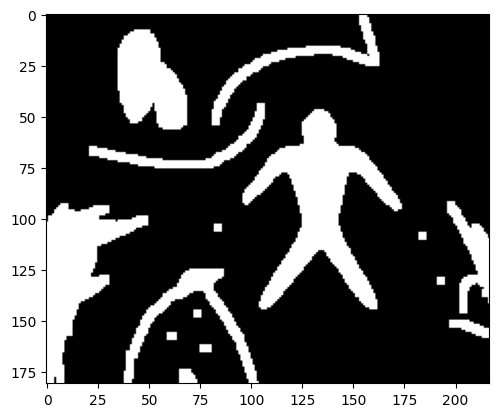

In [36]:
SourceImage = ImagesToAnalyse(cv2.imread("./E09.bmp"))
plt.imshow(SourceImage.binImage, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(SourceImage.filled, cmap='gray', vmin=0, vmax=255)